In this notebook, we'll work through an example of portfolio optimization. The exercises we do are related to the work by Harry Markowitz, a UChicago grad and winner of the Nobel prize in economics in 1990.

In [1]:
# always import all necessary libraries at the top of the file
import numpy as np
import scipy.optimize
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
%%HTML
<style>
body {
  counter-reset: section subsection;
}

h1 {
  counter-reset: subsection;
}

h1:before {
    counter-increment: section;
    content: "" counter(section) ". ";
}

h2:before {
    counter-increment: subsection;
    content: counter(section) "." counter(subsection) " ";
}
</style>

# Data

In this folder, there should be a file called `dataAssets.csv`. Make sure that you have this file. Run the code below to load the data into numpy arrays.

In the matrix of prices, each row corresponds to a day. The columns correspond, (in order,) to the S&P 500 index, USD index, crude oil index, HYG index, and U.S. 10-yr Treasury index.

In [3]:
data_assets = pd.read_csv('./dataAssets.csv', parse_dates=['date'])

In [4]:
data_assets.head()

,date,sp500,USD_index,crude_oil,HYG,treasury_10yr
0,2013-08-07,1690.91,81.287,87.83,91.36,2.5986
1,2013-08-08,1697.48,80.977,87.50,91.56,2.5892
2,2013-08-09,1691.42,81.126,87.95,91.57,2.5784
3,2013-08-12,1689.47,81.333,88.19,91.49,2.6206
4,2013-08-14,1685.39,81.711,88.47,91.31,2.7136


In [5]:
# Don't worry about the Pandas details here
prices = data_assets.iloc[:,1:].values
dates = data_assets.iloc[:,0].values

# Portfolio

 - (1) Calculate (level) return rates using the given price data. Multiply by 100 so that the returns are in percetages.

In [6]:
rets = (prices[1:,:]/prices[:-1,:] - 1) * 100

- (2) Form a portfolio of data, equally split between the S&P 500 and the Oil Index.

In [7]:
portfolio = 0.5 * rets[:,0] + 0.5 * rets[:,2]

- (3) Calculate the 20th percentile of the return history on this portfolio. (Use `numpy.percentile`. Be sure to specify in terms of percetages---between 0 and 100.)

In [8]:
percent = 30
np.percentile(portfolio, percent)

-0.3346055289382631

 - (4) Use `matplotlib.pyplot.hist` to create a histogram of the returns on this portfolio. Also plot a separate figure with a histogram of the returns for the S&P 500 and for Oil on the same plot. Use labels to distinguish them. You should probably plot Oil first, or at least set the alpha (transparancy) on each plot to something like 0.5. Be sure to include a legend.

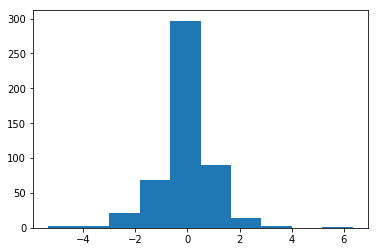

In [9]:
plt.hist(portfolio);

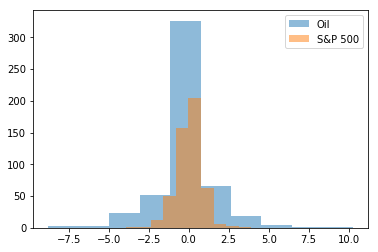

In [10]:
plt.hist(rets[:,2], alpha=.5, label='Oil');
plt.hist(rets[:,0], alpha=.5, label='S&P 500');
plt.legend()

# Optimizing Portfolio Variance

Consider a portfolio allocation vector, `w`, which sums to 1 and allocates a fraction of the portfolio to each of the 5 securities. For example

    w = np.array([.2, .2, .2, .2, .2])
    
allocates 20% to each asset.

In [11]:
# You may find that this code is helpful for viewing
# the arrays. Suppress will suppress scientific notation
# and precision sets the number of digits to print to
# the screen
np.set_printoptions(precision=5, suppress=True)

 - (1) First, calculate the covariance matrix of the assets. Save it to a variable called `Sigma`. Be sure to set the option of the covariance function to `rowvar=False`, since each column in our matrix is a variable, not each row. Alternatively, you could transpose the matrix.

In [12]:
np.std(rets, axis=0)

array([0.81393, 0.45069, 1.77966, 0.35557, 2.11412])

In [13]:
Sigma = np.cov(rets, rowvar=False)
Sigma

array([[ 0.66381,  0.04167,  0.34706,  0.18853,  0.57991],
       [ 0.04167,  0.20353, -0.11363,  0.00331,  0.2211 ],
       [ 0.34706, -0.11363,  3.17355,  0.19883,  0.78017],
       [ 0.18853,  0.00331,  0.19883,  0.12669,  0.05977],
       [ 0.57991,  0.2211 ,  0.78017,  0.05977,  4.47846]])

 - (2)
Write an in-line function that calculates the return variance for the allocation, `w`, using the formula
$$
w' \Sigma w.
$$
Try out your new function using the following portfolio weights:

    w = np.array([1,0,0,0,0])
    w = np.array([.2, .2, .2, .2, .2])
    w = np.array([.4, 0, .2, .2, .2])

In [14]:
f = lambda w: w.transpose() @ Sigma @ w

In [15]:
w = np.array([1,0,0,0,0])
f(w)

0.663805608592516

In [16]:
w = np.array([.2, .2, .2, .2, .2])
f(w)

0.530379191322454

In [17]:
w = np.array([.4, 0, .2, .2, .2])
f(w)

0.6789394052607582

 - (3) Write a constraint function called `con`. This takes in the vector of portfolio weights `w` and returns the difference between 1 and the sum of the portfolio weights. The purpose is that if the weights sum to one, then the function returns a zero. The zero indicates that the contraint holds.

In [18]:
con = lambda w: np.sum(w) - 1

 - (4) Minimize this portfolio variance, subject to the constraint that portfolio weights add to 1. 
 
To do this, check out the available constrained optimizers listed in the Scipy documentation: https://docs.scipy.org/doc/scipy/reference/optimize.html

Use sequential least squares: `scipy.optimize.fmin_slsqp`. Set the desired accuracy to `acc=1e-09` and set the option `iprint=2` so that the optimizer will display information at each iteration of the algorithm. You will need to set an initial guess for the optimizer to start from. Set the initial guess to

    w0 = np.array([.2, .2, .2, .2, .2])
    
Save the final results into a new variable called `wstar`.

In [19]:
w0 = np.array([.2, .2, .2, .2, .2])
wstar = scipy.optimize.fmin_slsqp(f, w0, f_eqcons=con, acc=1e-09, iprint=2)
wstar

  NIT    FC           OBJFUN            GNORM
    1     7     5.303792E-01     3.110235E+00
    2    15     1.451155E-01     7.936443E-01
    3    23     1.184656E-01     5.916318E-01
    4    30     8.320087E-02     3.802272E-01
    5    37     7.935392E-02     3.661971E-01
    6    44     7.273365E-02     3.251030E-01
    7    51     7.273360E-02     3.252712E-01
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.07273359519756034
            Iterations: 7
            Function evaluations: 51
            Gradient evaluations: 7


array([-0.13465,  0.36827,  0.00203,  0.75935,  0.00501])

 - (5) Test your newly optimized function. Evaluate the covariance of the portfolio at `wstar` and 
    
    `wstar + np.array([0.1, 0, 0, 0, -0.1])`

and

    wstar - np.array([0.1, 0, 0, 0, -0.1])
    
The perturbation will ensure that the constraint still holds. Does `wstar` appear to be an minimum?

In [20]:
f(wstar)

0.07273359519756034

In [21]:
f(wstar + np.array([0.1, 0, 0, 0, -0.1]))

0.11255769795725505

In [22]:
f(wstar - np.array([0.1, 0, 0, 0, -0.1]))

0.11255830646366743